# Задание №1

In [28]:
from IPython.display import display, Math

#Формула среднеквадратичной ошибки
display(Math(r'MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2'))

#Исходные данные
X=[1,2,3,5]
Y=[5,13,12,14]

#Исходные функции
def F1(x):
    return 15+2*x

def F2(x):
    return 10+x
            
def F3(x):
    return 5+1.5*x

mse_for_all_funcs={}

for func in (F1,F2,F3):
    #список ошибок каждой строки для конкретной функции
    errors=[]
    
    #расчет ошибок каждой строки для конкретной функции
    for i in range(len(X)):
        y_pred=func(X[i])
        y=Y[i]
        square_error=(y-y_pred)**2
        errors.append(square_error)

    mse=sum(errors)/len(errors)

    print(f"mse для функции {func.__name__} = {mse}")
    
    mse_for_all_funcs[func.__name__]=mse
    
    
print(f"\nФункция с наименьшей среднеквадратичной ошибкой: {min((mse_for_all_funcs))}")


<IPython.core.display.Math object>

mse для функции F1 = 95.5
mse для функции F2 = 9.75
mse для функции F3 = 8.9375

Функция с наименьшей среднеквадратичной ошибкой: F1


# Задание №2 (Метод наименьших квадратов)

In [36]:
import pandas as pd
import numpy as np
data={'X':[1,2,3,5], 'Y':[5,13,12,14]}

data=pd.DataFrame(data)

data['X2']=data['X']**2
data['XY']=data['Y']*data['X']

data

,X,Y,X2,XY
0,1,5,1,5
1,2,13,4,26
2,3,12,9,36
3,5,14,25,70


In [42]:
sum_X=sum(data['X'])
sum_X2=sum(data['X2'])
sum_XY=sum(data['XY'])
sum_Y=sum(data['Y'])

##### Получаем систему уравнений и далее решаем методом Краммера

In [43]:
print(f"a*{sum_X2}+b*{sum_X}={sum_XY}")
print(f"a*{sum_X}+b*{len(data['X'])}={sum_Y}")

a*39+b*11=137
a*11+b*4=44


In [55]:
delta1=np.array([[sum_X2,sum_X],[sum_X,len(data['X'])]])

delta=np.linalg.det(delta1)

if delta!=0:
    print(f"Система совместна так как Δ={round(delta,2)} и Δ!=0")

Система совместна так как Δ=35.0 и Δ!=0


In [60]:
delta1_x=np.array([[sum_XY,sum_X],[sum_Y,len(data['X'])]])
delta_x=np.linalg.det(delta1_x)

delta1_y=np.array([[sum_X2,sum_XY],[sum_X,sum_Y]])
delta_y=np.linalg.det(delta1_y)

a=delta_x/delta
b=delta_y/delta

##### Строим график график точек и линии тренда

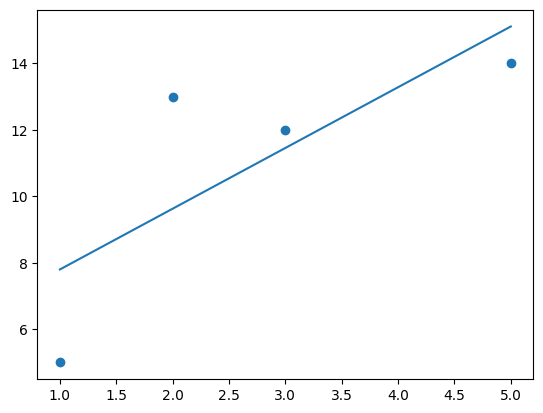

In [61]:
import matplotlib.pyplot as plt

fx=a*data['X']+b

plt.scatter(data['X'],data['Y'])
plt.plot(data['X'], fx)

# Задание №3 (MSE для второго задания)

In [73]:
errors=[]
for i in range(len(data['X'])):
    error=(data.loc[i]['Y']-(a*data.loc[i]['X']+b))**2
    errors.append(error)
    
mse=sum(errors)/len(errors)
print(f"mse для задачи №2 = {round(mse,2)}")

mse для задачи №2 = 5.19
